In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./tslec'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
comment_df = pd.read_excel(open('2022-05-06_19_17_37.xlsx', 'rb'),
              sheet_name='Comments', skiprows=[0])  

In [4]:
comment_df.head(5)

–°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å–µ—Ç—å           ID –ø–æ—Å—Ç–∞     ID –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è  \
0       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ    -115807015_2334       5412482_2336   
1       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -30666517_1774956  308730199_1774960   
2       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -30666517_1774956   10784303_1774979   
3       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -30666517_1774956  586953361_1775092   
4       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -30666517_1774956   19496621_1775350   

                 –í–ª–∞–¥–µ–ª–µ—Ü  ID –í–ª–∞–¥–µ–ª–µ—Ü–∞  \
0       –í–∞–ª–µ–Ω—Ç–∏–Ω –¢–æ—á–∏–ª–∫–∏–Ω       5412482   
1          –î–µ–Ω–∏—Å –ì–æ–Ω—á–∞—Ä–æ–≤     308730199   
2              –û–ª–µ–≥ –ö–∏—Ä–∏–Ω      10784303   
3         –ó–∞–º–±–µ–∫ –ó–∞–º–±–µ–∫–æ–≤     586953361   
4  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –ë–∏—Ä–∞–±–∏–¥–∂–∞–Ω–æ–≤      19496621   

                                               –¢–µ–∫—Å—Ç –≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–∫—Ä–∞—Å  \
0  –ó–∞–¥—É–º–∫–∞ –ø–æ–Ω—Ä–∞–≤–∏–ª–∞—Å—å! –î—É–º–∞—é –±—É–¥–µ—Ç —Å–º–æ—Ç—Ä–µ—Ç—å—Å—è –ª—É...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
1  –í–∞–º —Ç–æ–∂–µ –∑–¥–æ—Ä–æ–≤—å—è –∏ —É–¥–∞—á–∏ –≤ –ø—Ä–æ—à–ª–æ–º –∏ –∫—Ä–µ–ø–∫–æ–≥–æ...          –í–µ–∂–ª–∏–≤–æ—Å—Ç—å   
2  –ü–æ–ª–∞–≥–∞—é: –í–µ—Ä–∞ –∏ –ù–∞–¥–µ–∂–¥–∞ ‚Äì —ç—Ç–æ —Ç–∏–º–ª–∏–¥ –∏ –ø—Ä–æ–∂–µ–∫—Ç...                –Æ–º–æ—Ä   
3             —ç—Ç–æ—Ç –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç –Ω–∞ –∞–ª–∏ –¥–∞–≤–Ω–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
4                                 –ë—É–¥–µ—Ç –≤–µ—á–Ω—ã–π –°–≤–µ—Ç.       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   

                  –î–∞—Ç–∞  –õ–∞–π–∫–æ–≤  
0  2021-12-31 08:19:05       1  
1  2021-12-31 07:09:40       9  
2  2021-12-31 09:20:39       4  
3  2021-12-31 20:38:00       1  
4  2022-01-03 00:04:52       1

In [5]:
report_df = pd.read_excel(open('2022-05-06_19_17_37.xlsx', 'rb'),
              sheet_name='Report', skiprows=[0])  

In [6]:
report_df.head(5)

–°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å–µ—Ç—å          ID –ø–æ—Å—Ç–∞  \
0       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -159668210_25795   
1       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -74188185_20318   
2       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -74188185_20317   
3       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -21732035_11926   
4       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ      -718901_3742   

                                        –í–ª–∞–¥–µ–ª–µ—Ü  \
0                     FSOCIETY | IT - —Å–æ–æ–±—â–µ—Å—Ç–≤–æ   
1                                         dev.by   
2                                         dev.by   
3  –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–∞—è –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å - Anti-Malware.ru   
4                                   EPAM Belarus   

                                               –¢–µ–∫—Å—Ç –≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–∫—Ä–∞—Å  \
0  –ù–∞–º –∑–∞–¥–∞—é—Ç –º–Ω–æ–≥–æ –≤–æ–ø—Ä–æ—Å–æ–≤ –æ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–º –∫–æ...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
1  –í –≤—ã—Å–∞–¥–∫–µ –Ω–∞ –ú–∞—Ä—Å –±–∏–∑–Ω–µ—Å–º–µ–Ω –≤–∏–¥–∏—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å ...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
2  –ì–æ—Ä–∞–∑–¥–æ —á–∞—â–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏ –∏...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
3  Twitter-–∞–∫–∫–∞—É–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π —Ä–∞–Ω–µ–µ —Å–≤—è–∑—ã–≤–∞–ª–∏ —Å –∑–∞—â...             –ù–µ–≥–∞—Ç–∏–≤   
4  –î–æ—Ä–æ–≥–∏–µ –∫–æ–ª–ª–µ–≥–∏ –∏ –¥—Ä—É–∑—å—è! \n‚†Ä \n–°–ø–∞—Å–∏–±–æ –∑–∞ –≤–∞—à...             –ü–æ–∑–∏—Ç–∏–≤   

                  –î–∞—Ç–∞  –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –õ–∞–π–∫–æ–≤  –†–µ–ø–æ—Å—Ç–æ–≤  –ü—Ä–æ—Å–º–æ—Ç—Ä–æ–≤  \
0  2021-12-31 07:45:00             0       0         0      3548.0   
1  2021-12-31 07:41:31             0       2         0       346.0   
2  2021-12-31 07:40:42             0       0         0       319.0   
3  2021-12-31 07:23:16             0       2         0       222.0   
4  2021-12-31 07:13:35             0      37         2      3956.0   

   –ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  \
0                        0                        0                         0   
1                        0                        0                         0   
2                        0                        0                         0   
3                        0                        0                         0   
4                        0                        0                         0   

   –ù–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –í–µ–∂–ª–∏–≤—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                            0                      0   

   –Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

#–ó–∞–¥–∞–Ω–∏–µ 3

–ü–æ—Å—Ç—Ä–æ–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π –¥–∞—Ç—É –∏ —Å—É–º–º–∞—Ä–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –ø–æ—Å—Ç–æ–≤ –∑–∞ —ç—Ç–æ—Ç –¥–µ–Ω—å

In [7]:
report_df['–î–µ–Ω—å'] = report_df['–î–∞—Ç–∞'].apply(lambda x: x[0:10])

In [8]:
report_df.head(5)

–°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å–µ—Ç—å          ID –ø–æ—Å—Ç–∞  \
0       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -159668210_25795   
1       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -74188185_20318   
2       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -74188185_20317   
3       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -21732035_11926   
4       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ      -718901_3742   

                                        –í–ª–∞–¥–µ–ª–µ—Ü  \
0                     FSOCIETY | IT - —Å–æ–æ–±—â–µ—Å—Ç–≤–æ   
1                                         dev.by   
2                                         dev.by   
3  –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–∞—è –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å - Anti-Malware.ru   
4                                   EPAM Belarus   

                                               –¢–µ–∫—Å—Ç –≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–∫—Ä–∞—Å  \
0  –ù–∞–º –∑–∞–¥–∞—é—Ç –º–Ω–æ–≥–æ –≤–æ–ø—Ä–æ—Å–æ–≤ –æ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–º –∫–æ...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
1  –í –≤—ã—Å–∞–¥–∫–µ –Ω–∞ –ú–∞—Ä—Å –±–∏–∑–Ω–µ—Å–º–µ–Ω –≤–∏–¥–∏—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å ...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
2  –ì–æ—Ä–∞–∑–¥–æ —á–∞—â–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏ –∏...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
3  Twitter-–∞–∫–∫–∞—É–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π —Ä–∞–Ω–µ–µ —Å–≤—è–∑—ã–≤–∞–ª–∏ —Å –∑–∞—â...             –ù–µ–≥–∞—Ç–∏–≤   
4  –î–æ—Ä–æ–≥–∏–µ –∫–æ–ª–ª–µ–≥–∏ –∏ –¥—Ä—É–∑—å—è! \n‚†Ä \n–°–ø–∞—Å–∏–±–æ –∑–∞ –≤–∞—à...             –ü–æ–∑–∏—Ç–∏–≤   

                  –î–∞—Ç–∞  –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –õ–∞–π–∫–æ–≤  –†–µ–ø–æ—Å—Ç–æ–≤  –ü—Ä–æ—Å–º–æ—Ç—Ä–æ–≤  \
0  2021-12-31 07:45:00             0       0         0      3548.0   
1  2021-12-31 07:41:31             0       2         0       346.0   
2  2021-12-31 07:40:42             0       0         0       319.0   
3  2021-12-31 07:23:16             0       2         0       222.0   
4  2021-12-31 07:13:35             0      37         2      3956.0   

   –ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  \
0                        0                        0                         0   
1                        0                        0                         0   
2                        0                        0                         0   
3                        0                        0                         0   
4                        0                        0                         0   

   –ù–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –í–µ–∂–ª–∏–≤—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                            0                      0   

   –Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤        –î–µ–Ω—å  
0                            0  2021-12-31  
1                            0  2021-12-31  
2                            0  2021-12-31  
3                            0  2021-12-31  
4                            0  2021-12-31

–î–æ–±–∞–≤–∏–ª–∏ –∫–æ–ª–æ–Ω–∫—É —Å –¥–Ω–µ–º

In [9]:
dates = report_df['–î–µ–Ω—å'].unique().tolist()

In [10]:
dates = [i[0:10] for i in dates]
sums = []

In [11]:
for date in dates:
  temp_df = report_df.loc[report_df['–î–µ–Ω—å'] == date]
  sum = temp_df['–ü—Ä–æ—Å–º–æ—Ç—Ä–æ–≤'].sum()
  sums.append(sum)
  #print("Date ", date)
  #print("Sum ", sum)

In [12]:
df_to_forecast = pd.DataFrame(list(zip(dates, sums)),
               columns =['Date', 'Sum'])

In [13]:
df_to_forecast.head(5)

Date        Sum
0  2021-12-31    79657.0
1  2021-12-30  5230248.0
2  2021-12-29   816734.0
3  2021-12-28   780446.0
4  2021-12-27   716678.0

–ü–æ–ª—É—á–∏–ª–∏ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è —Ä–∞–±–æ—Ç—ã

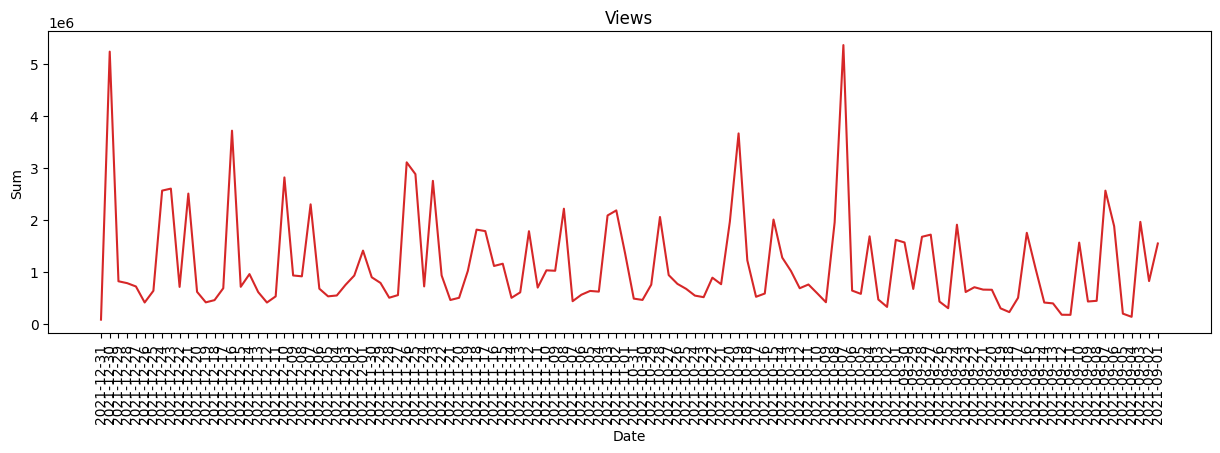

In [14]:
def plot_df(df_to_forecast, x, y, title="", xlabel='Date', ylabel='Sum', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90)
    plt.show()
    

plot_df(df_to_forecast, x=df_to_forecast['Date'], y=df_to_forecast['Sum'], title='Views')

–†–∞–∑–æ–±—ä–µ–º –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –Ω–∞ —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∏–µ

In [15]:
df = df_to_forecast

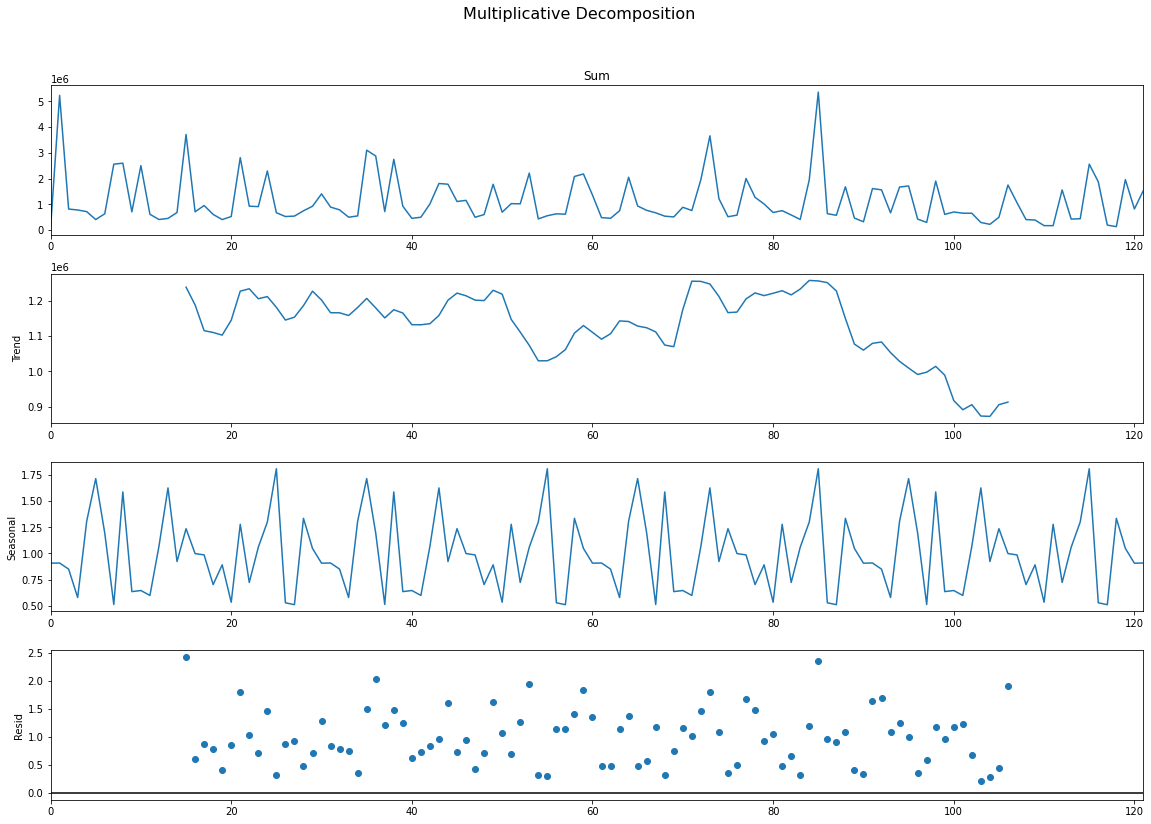

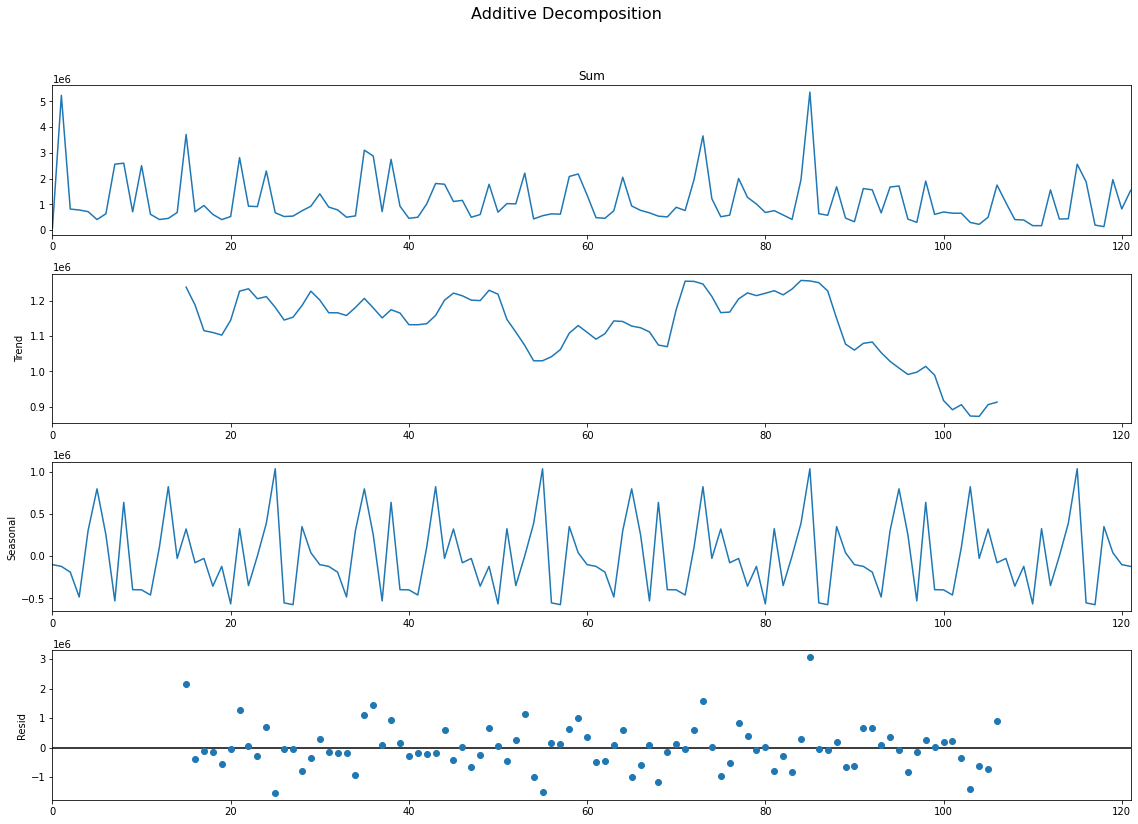

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Sum'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Sum'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

–ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å

In [17]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Sum'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -9.6801392380864
n_lags: 1.2108021682798916e-16
p-value: 1.2108021682798916e-16
Critial Values:
   1%, -3.486055829282407
Critial Values:
   5%, -2.8859430324074076
Critial Values:
   10%, -2.5797850694444446


–†—è–¥ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π

–ò—Å–ø–æ–ª—å–∑—É–µ–º SARIMAX

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
df.isna().sum() 

Date    0
Sum     0
dtype: int64

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    122 non-null    datetime64[ns]
 1   Sum     122 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [22]:
df

Date        Sum
0   2021-12-31    79657.0
1   2021-12-30  5230248.0
2   2021-12-29   816734.0
3   2021-12-28   780446.0
4   2021-12-27   716678.0
..         ...        ...
117 2021-09-05   194381.0
118 2021-09-04   133318.0
119 2021-09-03  1958340.0
120 2021-09-02   820271.0
121 2021-09-01  1542779.0

[122 rows x 2 columns]

In [23]:
arima = SARIMAX(df['Sum'],order=(7,1,7))
arima_results = arima.fit()
arima_value_forecast = arima_results.get_forecast(steps=31).predicted_mean

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


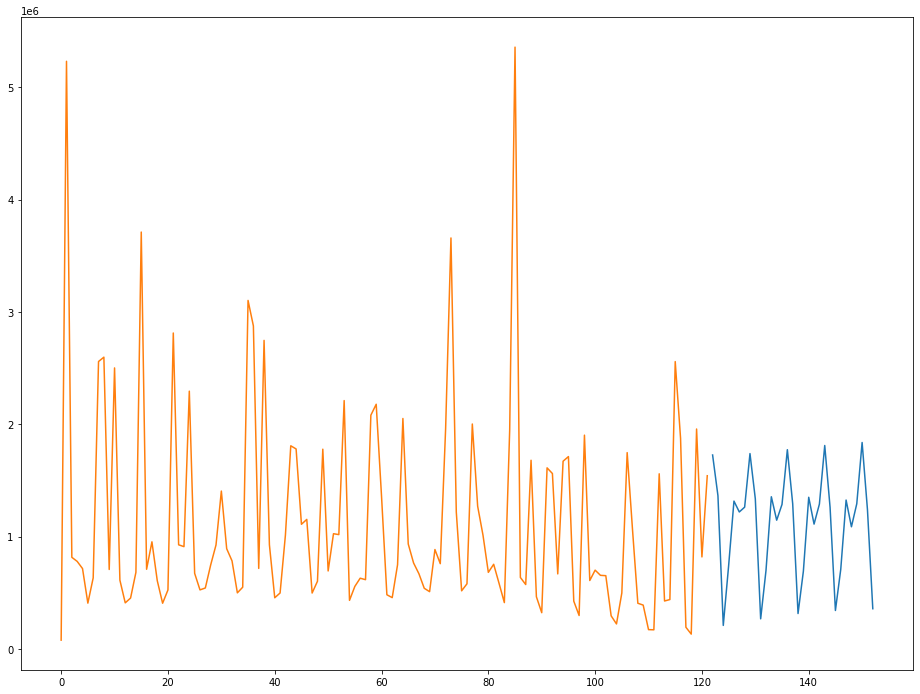

In [24]:
plt.plot(arima_value_forecast)
plt.plot(df['Sum'])

–ü–æ–ª—É—á–∏–ª–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ 31 –¥–µ–Ω—å

–í–∏–¥–∏–º, —á—Ç–æ –º–æ–¥–µ–ª—å –ø—Ä–∏–º–µ—Ä–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç

#–ó–∞–¥–∞–Ω–∏–µ 2

In [25]:
report_df.head()

–°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å–µ—Ç—å          ID –ø–æ—Å—Ç–∞  \
0       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -159668210_25795   
1       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -74188185_20318   
2       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -74188185_20317   
3       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -21732035_11926   
4       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ      -718901_3742   

                                        –í–ª–∞–¥–µ–ª–µ—Ü  \
0                     FSOCIETY | IT - —Å–æ–æ–±—â–µ—Å—Ç–≤–æ   
1                                         dev.by   
2                                         dev.by   
3  –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–∞—è –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å - Anti-Malware.ru   
4                                   EPAM Belarus   

                                               –¢–µ–∫—Å—Ç –≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–∫—Ä–∞—Å  \
0  –ù–∞–º –∑–∞–¥–∞—é—Ç –º–Ω–æ–≥–æ –≤–æ–ø—Ä–æ—Å–æ–≤ –æ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–º –∫–æ...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
1  –í –≤—ã—Å–∞–¥–∫–µ –Ω–∞ –ú–∞—Ä—Å –±–∏–∑–Ω–µ—Å–º–µ–Ω –≤–∏–¥–∏—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å ...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
2  –ì–æ—Ä–∞–∑–¥–æ —á–∞—â–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏ –∏...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
3  Twitter-–∞–∫–∫–∞—É–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π —Ä–∞–Ω–µ–µ —Å–≤—è–∑—ã–≤–∞–ª–∏ —Å –∑–∞—â...             –ù–µ–≥–∞—Ç–∏–≤   
4  –î–æ—Ä–æ–≥–∏–µ –∫–æ–ª–ª–µ–≥–∏ –∏ –¥—Ä—É–∑—å—è! \n‚†Ä \n–°–ø–∞—Å–∏–±–æ –∑–∞ –≤–∞—à...             –ü–æ–∑–∏—Ç–∏–≤   

                  –î–∞—Ç–∞  –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –õ–∞–π–∫–æ–≤  –†–µ–ø–æ—Å—Ç–æ–≤  –ü—Ä–æ—Å–º–æ—Ç—Ä–æ–≤  \
0  2021-12-31 07:45:00             0       0         0      3548.0   
1  2021-12-31 07:41:31             0       2         0       346.0   
2  2021-12-31 07:40:42             0       0         0       319.0   
3  2021-12-31 07:23:16             0       2         0       222.0   
4  2021-12-31 07:13:35             0      37         2      3956.0   

   –ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  \
0                        0                        0                         0   
1                        0                        0                         0   
2                        0                        0                         0   
3                        0                        0                         0   
4                        0                        0                         0   

   –ù–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –í–µ–∂–ª–∏–≤—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                            0                      0   

   –Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤        –î–µ–Ω—å  
0                            0  2021-12-31  
1                            0  2021-12-31  
2                            0  2021-12-31  
3                            0  2021-12-31  
4                            0  2021-12-31

In [26]:
df_report_for_bgramms = report_df['–¢–µ–∫—Å—Ç']

In [27]:
df_report_for_bgramms.head()

0    –ù–∞–º –∑–∞–¥–∞—é—Ç –º–Ω–æ–≥–æ –≤–æ–ø—Ä–æ—Å–æ–≤ –æ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–º –∫–æ...
1    –í –≤—ã—Å–∞–¥–∫–µ –Ω–∞ –ú–∞—Ä—Å –±–∏–∑–Ω–µ—Å–º–µ–Ω –≤–∏–¥–∏—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å ...
2    –ì–æ—Ä–∞–∑–¥–æ —á–∞—â–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏ –∏...
3    Twitter-–∞–∫–∫–∞—É–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π —Ä–∞–Ω–µ–µ —Å–≤—è–∑—ã–≤–∞–ª–∏ —Å –∑–∞—â...
4    –î–æ—Ä–æ–≥–∏–µ –∫–æ–ª–ª–µ–≥–∏ –∏ –¥—Ä—É–∑—å—è! \n‚†Ä \n–°–ø–∞—Å–∏–±–æ –∑–∞ –≤–∞—à...
Name: –¢–µ–∫—Å—Ç, dtype: object

In [28]:
comment_df.head()

–°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å–µ—Ç—å           ID –ø–æ—Å—Ç–∞     ID –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è  \
0       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ    -115807015_2334       5412482_2336   
1       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -30666517_1774956  308730199_1774960   
2       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -30666517_1774956   10784303_1774979   
3       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -30666517_1774956  586953361_1775092   
4       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -30666517_1774956   19496621_1775350   

                 –í–ª–∞–¥–µ–ª–µ—Ü  ID –í–ª–∞–¥–µ–ª–µ—Ü–∞  \
0       –í–∞–ª–µ–Ω—Ç–∏–Ω –¢–æ—á–∏–ª–∫–∏–Ω       5412482   
1          –î–µ–Ω–∏—Å –ì–æ–Ω—á–∞—Ä–æ–≤     308730199   
2              –û–ª–µ–≥ –ö–∏—Ä–∏–Ω      10784303   
3         –ó–∞–º–±–µ–∫ –ó–∞–º–±–µ–∫–æ–≤     586953361   
4  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –ë–∏—Ä–∞–±–∏–¥–∂–∞–Ω–æ–≤      19496621   

                                               –¢–µ–∫—Å—Ç –≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–∫—Ä–∞—Å  \
0  –ó–∞–¥—É–º–∫–∞ –ø–æ–Ω—Ä–∞–≤–∏–ª–∞—Å—å! –î—É–º–∞—é –±—É–¥–µ—Ç —Å–º–æ—Ç—Ä–µ—Ç—å—Å—è –ª—É...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
1  –í–∞–º —Ç–æ–∂–µ –∑–¥–æ—Ä–æ–≤—å—è –∏ —É–¥–∞—á–∏ –≤ –ø—Ä–æ—à–ª–æ–º –∏ –∫—Ä–µ–ø–∫–æ–≥–æ...          –í–µ–∂–ª–∏–≤–æ—Å—Ç—å   
2  –ü–æ–ª–∞–≥–∞—é: –í–µ—Ä–∞ –∏ –ù–∞–¥–µ–∂–¥–∞ ‚Äì —ç—Ç–æ —Ç–∏–º–ª–∏–¥ –∏ –ø—Ä–æ–∂–µ–∫—Ç...                –Æ–º–æ—Ä   
3             —ç—Ç–æ—Ç –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç –Ω–∞ –∞–ª–∏ –¥–∞–≤–Ω–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
4                                 –ë—É–¥–µ—Ç –≤–µ—á–Ω—ã–π –°–≤–µ—Ç.       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   

                  –î–∞—Ç–∞  –õ–∞–π–∫–æ–≤  
0  2021-12-31 08:19:05       1  
1  2021-12-31 07:09:40       9  
2  2021-12-31 09:20:39       4  
3  2021-12-31 20:38:00       1  
4  2022-01-03 00:04:52       1

In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
from nltk.util import ngrams

In [41]:
comment_df["–¢–µ–∫—Å—Ç"].fillna("", inplace=True)

In [43]:
report_df.isna().sum()

–°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å–µ—Ç—å                 0
ID –ø–æ—Å—Ç–∞                        0
–í–ª–∞–¥–µ–ª–µ—Ü                        0
–¢–µ–∫—Å—Ç                           0
–≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–∫—Ä–∞—Å             0
–î–∞—Ç–∞                            0
–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤                    0
–õ–∞–π–∫–æ–≤                          0
–†–µ–ø–æ—Å—Ç–æ–≤                        0
–ü—Ä–æ—Å–º–æ—Ç—Ä–æ–≤                     37
–ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤         0
–ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤         0
–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤        0
–ù–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤     0
–í–µ–∂–ª–∏–≤—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤           0
–Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤     0
–î–µ–Ω—å                            0
dtype: int64

In [42]:
comment_df.isna().sum()

–°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å–µ—Ç—å        0
ID –ø–æ—Å—Ç–∞               0
ID –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è         0
–í–ª–∞–¥–µ–ª–µ—Ü               0
ID –í–ª–∞–¥–µ–ª–µ—Ü–∞           0
–¢–µ–∫—Å—Ç                  0
–≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–∫—Ä–∞—Å    0
–î–∞—Ç–∞                   0
–õ–∞–π–∫–æ–≤                 0
dtype: int64

In [44]:
comment_texts = comment_df['–¢–µ–∫—Å—Ç'].tolist()
for i in range(5):
  print(comment_texts[i])

–ó–∞–¥—É–º–∫–∞ –ø–æ–Ω—Ä–∞–≤–∏–ª–∞—Å—å! –î—É–º–∞—é –±—É–¥–µ—Ç —Å–º–æ—Ç—Ä–µ—Ç—å—Å—è –ª—É—á—à–µ, –µ—Å–ª–∏ —Å–∞–º–∏ –≥—Ä–∞—Ñ—Ñ–∏—Ç–∏ –±—É–¥—É—Ç –≤–µ—Å–µ–ª—ã–º–∏ –∫–∞—Ä—Ç–∏–Ω–∫–∞–º–∏ –∏–ª–∏ –º–µ–º–∞–º–∏, –∞ –ø—Ä–æ—Å—Ç–æ –Ω–∞–¥–ø–∏—Å–∏ –∫–∞–∫ –≤ —Ä–µ–∞–ª—å–Ω–æ—Å—Ç–∏ —Å–º–æ—Ç—Ä—è—Ç—Å—è –Ω–µ –æ—á–µ–Ω—å. –ù–∞ —É–º –ø—Ä–∏—Ö–æ–¥–∏—Ç –ë—ç–Ω–∫—Å–∏
–í–∞–º —Ç–æ–∂–µ –∑–¥–æ—Ä–æ–≤—å—è –∏ —É–¥–∞—á–∏ –≤ –ø—Ä–æ—à–ª–æ–º –∏ –∫—Ä–µ–ø–∫–æ–≥–æ —é–º–æ—Ä–∞ –≤ —Å–ª–µ–¥—É—é—â–∏–µ 365 –Ω–µ–¥–µ–ª–µ–π –∏ –Ω–∞—Å—Ç—É–ø–∞—é—â–∏—Ö –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã—Ö –¥–Ω–µ–π!
–ü–æ–ª–∞–≥–∞—é: –í–µ—Ä–∞ –∏ –ù–∞–¥–µ–∂–¥–∞ ‚Äì —ç—Ç–æ —Ç–∏–º–ª–∏–¥ –∏ –ø—Ä–æ–∂–µ–∫—Ç–º–∞–Ω–∞–≥–µ—Ä.
—ç—Ç–æ—Ç –∏–Ω—Ç–µ–ª–ª–µ–∫—Ç –Ω–∞ –∞–ª–∏ –¥–∞–≤–Ω–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç
–ë—É–¥–µ—Ç –≤–µ—á–Ω—ã–π –°–≤–µ—Ç.


In [45]:
from nltk.tokenize import RegexpTokenizer

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [48]:
import re

In [50]:
from nltk.util import ngrams

In [51]:
n = 2

In [ ]:
comment_2grams = []
for text in comment_texts:
  text = text.lower()
  text = re.sub(r'[^\w\s]','',text)
  bigrams = ngrams(text.split(), n)
  for item in bigrams:
    comment_2grams.append(item)
  

In [58]:
type(comment_2grams[0])

tuple

In [59]:
from collections import Counter

In [66]:
res = dict(Counter([x for x in comment_2grams]).most_common())

In [72]:
from itertools import islice

def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

In [74]:
n_items = take(10, res.items())
n_items

[(('—É', '–º–µ–Ω—è'), 603),
 (('—É', '–≤–∞—Å'), 410),
 (('–∏', '–Ω–µ'), 393),
 (('–ø–æ', '–º–æ–µ–π'), 333),
 (('—è', '–Ω–µ'), 295),
 (('–±–µ—Å–ø–ª–∞—Ç–Ω–æ–µ', '–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ'), 288),
 (('–ø–æ—Ç–æ–º—É', '—á—Ç–æ'), 286),
 (('–º–æ–µ–π', '—Å—Å—ã–ª–∫–µ'), 283),
 (('–±–µ—Å–ø–ª–∞—Ç–Ω—ã–º', '–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º'), 271),
 (('2', '–º–µ—Å—è—Ü–∞'), 264)]

–°–∞–º—ã–µ —á–∞—Å—Ç–æ–≤—Å—Ç—Ä–µ—á–∞–µ–º—ã–µ –±–∏–≥—Ä–∞–º–º—ã –∏–∑ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤

In [75]:
report_texts = report_df['–¢–µ–∫—Å—Ç'].tolist()

In [76]:
report_2grams = []
for text in report_texts:
  text = text.lower()
  text = re.sub(r'[^\w\s]','',text)
  bigrams = ngrams(text.split(), n)
  for item in bigrams:
    report_2grams.append(item)

In [77]:
res = dict(Counter([x for x in report_2grams]).most_common())

In [78]:
res

{('–ø–æ', '—Å—Å—ã–ª–∫–µ'): 1263,
 ('–∞', '—Ç–∞–∫–∂–µ'): 1027,
 ('–æ', '—Ç–æ–º'): 799,
 ('—Å', '–ø–æ–º–æ—â—å—é'): 660,
 ('–Ω–∞', '—Å–∞–π—Ç–µ'): 604,
 ('–≤', '—ç—Ç–æ–º'): 586,
 ('–∏', '–∫–∞–∫'): 568,
 ('–≤', '—Ä–æ—Å—Å–∏–∏'): 542,
 ('–µ—Å–ª–∏', '–≤—ã'): 495,
 ('–Ω–µ', '—Ç–æ–ª—å–∫–æ'): 492,
 ('–≤', '—Ä–∞–º–∫–∞—Ö'): 482,
 ('–≤–º–µ—Å—Ç–µ', '—Å'): 453,
 ('—Ç–æ–º', '–∫–∞–∫'): 452,
 ('–∏', '–Ω–µ'): 447,
 ('–∏', '–≤'): 427,
 ('2021', '–≥–æ–¥–∞'): 424,
 ('—É—á–∞—Å—Ç–∏–µ', '–≤'): 410,
 ('—É', '–Ω–∞—Å'): 408,
 ('–≤', '—Å—Ñ–µ—Ä–µ'): 395,
 ('–≤', 'it'): 384,
 ('–Ω–æ', '–∏'): 335,
 ('–Ω–∞', '–Ω–∞—à–µ–º'): 332,
 ('–≤', '–æ–±–ª–∞—Å—Ç–∏'): 328,
 ('–≤–æ', '–≤—Ä–µ–º—è'): 327,
 ('–∏', '–¥—Ä—É–≥–∏–µ'): 325,
 ('—Ç–µ—Ö', '–∫—Ç–æ'): 311,
 ('–¥–ª—è', '–≤–∞—Å'): 310,
 ('—Ç–µ—Ö–Ω–æ–ø–æ–ª–∏—Å', '–º–æ—Å–∫–≤–∞'): 306,
 ('—É', '–≤–∞—Å'): 302,
 ('–≤—ã', '—Å–º–æ–∂–µ—Ç–µ'): 292,
 ('–≤', '—Ç–µ—á–µ–Ω–∏–µ'): 290,
 ('–≤', '—Ç–æ–º'): 290,
 ('—á—Ç–æ', '—Ç–∞–∫–æ–µ'): 281,
 ('–≤—ã', '—É–∑–Ω–∞–µ—Ç–µ'): 275,
 ('–≤', '–º–æ—Å–∫–≤–µ'

In [79]:
n_items = take(10, res.items())
n_items

[(('–ø–æ', '—Å—Å—ã–ª–∫–µ'), 1263),
 (('–∞', '—Ç–∞–∫–∂–µ'), 1027),
 (('–æ', '—Ç–æ–º'), 799),
 (('—Å', '–ø–æ–º–æ—â—å—é'), 660),
 (('–Ω–∞', '—Å–∞–π—Ç–µ'), 604),
 (('–≤', '—ç—Ç–æ–º'), 586),
 (('–∏', '–∫–∞–∫'), 568),
 (('–≤', '—Ä–æ—Å—Å–∏–∏'), 542),
 (('–µ—Å–ª–∏', '–≤—ã'), 495),
 (('–Ω–µ', '—Ç–æ–ª—å–∫–æ'), 492)]

–ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ –±–∏–≥—Ä–∞–º–º—ã –≤ –ø–æ—Å—Ç–∞—Ö

#–ó–∞–¥–∞–Ω–∏–µ 1

–ò–¥–µ—è:


1.   –°–º–æ—Ç—Ä–∏–º –æ–∫—Ä–∞—Å –ø–æ—Å—Ç–∞
2.   –°–æ–±–∏—Ä–∞–µ–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–∫—Ä–∞—Å–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–º–µ–Ω—Ç–æ–≤
3.   –ò–∑—É—á–∞–µ–º –æ–∫—Ä–∞—Å—ã –∫–æ–º–º–µ–Ω—Ç–æ–≤
4.   –°–æ–±–∏—Ä–∞–µ–º –≤—Å–µ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
5.   –ò–∑—É—á–∞–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –∏ –¥—É–º–∞–µ–º, —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏



In [80]:
report_df

–°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å–µ—Ç—å          ID –ø–æ—Å—Ç–∞  \
0           –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -159668210_25795   
1           –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -74188185_20318   
2           –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -74188185_20317   
3           –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -21732035_11926   
4           –í–∫–æ–Ω—Ç–∞–∫—Ç–µ      -718901_3742   
...               ...               ...   
13625       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ      -25758_79797   
13626       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ   -68023176_17665   
13627       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ     -66178731_602   
13628       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ  -139121250_17894   
13629       –í–∫–æ–Ω—Ç–∞–∫—Ç–µ    -154862566_520   

                                            –í–ª–∞–¥–µ–ª–µ—Ü  \
0                         FSOCIETY | IT - —Å–æ–æ–±—â–µ—Å—Ç–≤–æ   
1                                             dev.by   
2                                             dev.by   
3      –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–∞—è –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å - Anti-Malware.ru   
4                                       EPAM Belarus   
...                                              ...   
13625      Changellenge >> –ö–∞—Ä—å–µ—Ä–∞ –æ—Ç —Å—Ç—É–¥–µ–Ω—Ç–∞ –∫ –°–ï–û   
13626                                     AppTractor   
13627      –£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–æ–µ–∫—Ç–∞–º–∏ –≤ –†–æ—Å—Å–∏–∏ | –ì–ö –ü–ú–°–û–§–¢   
13628                                        iT News   
13629                  –ö–ª–µ–≤–µ—Ä | –ñ—É—Ä–Ω–∞–ª –æ —Ä–∞–±–æ—Ç–µ –≤ IT   

                                                   –¢–µ–∫—Å—Ç –≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–∫—Ä–∞—Å  \
0      –ù–∞–º –∑–∞–¥–∞—é—Ç –º–Ω–æ–≥–æ –≤–æ–ø—Ä–æ—Å–æ–≤ –æ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–º –∫–æ...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
1      –í –≤—ã—Å–∞–¥–∫–µ –Ω–∞ –ú–∞—Ä—Å –±–∏–∑–Ω–µ—Å–º–µ–Ω –≤–∏–¥–∏—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å ...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
2      –ì–æ—Ä–∞–∑–¥–æ —á–∞—â–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏ –∏...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
3      Twitter-–∞–∫–∫–∞—É–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π —Ä–∞–Ω–µ–µ —Å–≤—è–∑—ã–≤–∞–ª–∏ —Å –∑–∞—â...             –ù–µ–≥–∞—Ç–∏–≤   
4      –î–æ—Ä–æ–≥–∏–µ –∫–æ–ª–ª–µ–≥–∏ –∏ –¥—Ä—É–∑—å—è! \n‚†Ä \n–°–ø–∞—Å–∏–±–æ –∑–∞ –≤–∞—à...             –ü–æ–∑–∏—Ç–∏–≤   
...                                                  ...                 ...   
13625  #education@changellengeglobal #Changellenge #C...             –ü–æ–∑–∏—Ç–∏–≤   
13626  –í —ç—Ç–æ–π —Å—Ç–∞—Ç—å–µ —è —Ö–æ—Ç–µ–ª –±—ã –ø–æ–¥–µ–ª–∏—Ç—å—Å—è —Å–≤–æ–∏–º –æ–ø—ã—Ç...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
13627  ¬†#–î–ï–ù–¨–ó–ù–ê–ù–ò–ô¬†#1–°–ï–ù–¢–Ø–ë–†–Ø¬†#–ü–ú–°–û–§–¢\nüçÅ‚òÄÔ∏èüßÅüéàüíê\n\n#—Å–ø...             –ü–æ–∑–∏—Ç–∏–≤   
13628  Microsoft —Ä–∞—Å–∫—Ä—ã–ª–∞ –¥–∞—Ç—É –≤—ã—Ö–æ–¥–∞ Windows 11\n \n...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   
13629  –°—Ç–∞–≤–∏—Ç—å —Ü–µ–ª–∏, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –æ–±—É—á–µ–Ω–∏–µ–º –Ω–æ–≤–æ–º—É, ‚Äì ...       –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å   

                      –î–∞—Ç–∞  –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –õ–∞–π–∫–æ–≤  –†–µ–ø–æ—Å—Ç–æ–≤  –ü—Ä–æ—Å–º–æ—Ç—Ä–æ–≤  \
0      2021-12-31 07:45:00             0       0         0      3548.0   
1      2021-12-31 07:41:31             0       2         0       346.0   
2      2021-12-31 07:40:42             0       0         0       319.0   
3      2021-12-31 07:23:16             0       2         0       222.0   
4      2021-12-31 07:13:35             0      37         2      3956.0   
...                    ...           ...     ...       ...         ...   
13625  2021-09-01 08:12:00             0       1         0      3430.0   
13626  2021-09-01 08:08:37             0       1         0       160.0   
13627  2021-09-01 08:01:23             0       3         0        66.0   
13628  2021-09-01 08:00:01             0       6         4       896.0   
13629  2021-09-01 07:59:46             0      13         5       810.0   

       –ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  –ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤  \
0                            0                        0   
1                            0                        0   
2                     

In [84]:
report_df.columns

Index(['–°–æ—Ü–∏–∞–ª—å–Ω–∞—è —Å–µ—Ç—å', 'ID –ø–æ—Å—Ç–∞', '–í–ª–∞–¥–µ–ª–µ—Ü', '–¢–µ–∫—Å—Ç',
       '–≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–∫—Ä–∞—Å', '–î–∞—Ç–∞', '–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤', '–õ–∞–π–∫–æ–≤', '–†–µ–ø–æ—Å—Ç–æ–≤',
       '–ü—Ä–æ—Å–º–æ—Ç—Ä–æ–≤', '–ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤', '–ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤',
       '–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤', '–ù–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤',
       '–í–µ–∂–ª–∏–≤—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤', '–Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤', '–î–µ–Ω—å'],
      dtype='object')

In [194]:
def getPostsData(posts_df):
  for index, row in report_df.iterrows():
      id = row['ID –ø–æ—Å—Ç–∞']
      self_emotion = row['–≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –æ–∫—Ä–∞—Å']
      positive = row['–ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤']
      negative = row['–ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤']
      neutral = row['–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤']
      uncertain = row['–ù–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤']
      polite = row['–í–µ–∂–ª–∏–≤—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤']
      humor = row['–Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤']
      self_count = 0
      sum = positive + negative + neutral + uncertain + polite + humor
      percentage = 0
      others_sum = 0
      if sum != 0:
        if self_emotion == '–ü–æ–∑–∏—Ç–∏–≤':
          percentage = (positive / sum) * 100
          self_count = positive
          others_sum = negative + neutral + uncertain + polite + humor
        if self_emotion == '–ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å':
          percentage = (neutral / sum) * 100
          self_count = neutral
          others_sum = positive + negative + uncertain + polite + humor
        if self_emotion == '–ù–µ–≥–∞—Ç–∏–≤':
          percentage = (negative / sum) * 100
          self_count = negative
          others_sum = positive + neutral + uncertain + polite + humor
        if self_emotion == '–í–µ–∂–ª–∏–≤–æ—Å—Ç—å':
          percentage = (polite / sum) * 100
          self_count = polite
          others_sum = positive + neutral + uncertain + negative + humor
        if self_emotion == '–ù–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç—å':
          percentage = (uncertain / sum) * 100
          self_count = uncertain
          others_sum = positive + neutral + negative + negative + humor
        if self_emotion == '–Æ–º–æ—Ä':
          percentage = (humor / sum) * 100
          self_count = humor
          others_sum = positive + neutral + uncertain + negative + negative
        post_data = [[id, self_emotion, positive, negative, neutral, uncertain, polite, humor, percentage, self_count, others_sum, sum]]
 
      
      
        df2 = pd.DataFrame(post_data, columns=['ID –ø–æ—Å—Ç–∞','–û–∫—Ä–∞—Å','–ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö', 
                                                    '–ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö', '–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö', '–ù–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö',
                                                    '–í–µ–∂–ª–∏–≤—ã—Ö', '–Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö', '–ü—Ä–æ—Ü–µ–Ω—Ç —Ç–∞–∫–∏—Ö –∂–µ', '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∂–µ', '–°—É–º–º–∞ –¥—Ä—É–≥–∏—Ö', '–û–±—â–∞—è —Å—É–º–º–∞'])
      
        posts_df = pd.concat([posts_df, df2])
  return posts_df

In [198]:
posts_df = pd.DataFrame()

In [199]:
result = getPostsData(posts_df)

In [200]:
result

ID –ø–æ—Å—Ç–∞          –û–∫—Ä–∞—Å  –ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö  –ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö  –ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö  \
0     -115807015_2334        –ü–æ–∑–∏—Ç–∏–≤           0           0            1   
0   -30666517_1774956        –ù–µ–≥–∞—Ç–∏–≤           0           0            2   
0    -54530371_346101  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           3            9   
0     -173250756_9317  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           0            2   
0    -54530371_346090  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           2            2   
..                ...            ...         ...         ...          ...   
0      -58536976_3138        –ü–æ–∑–∏—Ç–∏–≤           0           0            2   
0      -29617250_2531        –ü–æ–∑–∏—Ç–∏–≤           1           0            0   
0     -24682865_28855  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           1            3   
0    -139121250_17896  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           0            2   
0        -718901_3582        –ü–æ–∑–∏—Ç–∏–≤           0           0            1   

    –ù–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö  –í–µ–∂–ª–∏–≤—ã—Ö  –Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö  –ü—Ä–æ—Ü–µ–Ω—Ç —Ç–∞–∫–∏—Ö –∂–µ  \
0                0         0               0               0.0   
0                0         1               1               0.0   
0                1         0               2              60.0   
0                0         0               0             100.0   
0                0         0               0              50.0   
..             ...       ...             ...               ...   
0                0         0               0               0.0   
0                0         0               0             100.0   
0                1         0               1              50.0   
0                0         0               0             100.0   
0                0         0               0               0.0   

    –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∂–µ  –°—É–º–º–∞ –¥—Ä—É–≥–∏—Ö  –û–±—â–∞—è —Å—É–º–º–∞  
0                     0             1            1  
0                     0             4            4  
0                     9             6           15  
0                     2             0            2  
0                     2             2            4  
..                  ...           ...          ...  
0                     0             2            2  
0                     1             0            1  
0                     3             3            6  
0                     2             0            2  
0                     0             1            1  

[3211 rows x 12 columns]

–£–±—Ä–∞–ª–∏ –ø–æ—Å—Ç—ã –±–µ–∑ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤

–ü–æ—Å–º–æ—Ç—Ä–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏ –ø—Ä–æ—Ü–µ–Ω—Ç–∞

In [201]:
result['–û—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–≤–æ–∏—Ö'] = result['–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∂–µ'] / result['–ü—Ä–æ—Ü–µ–Ω—Ç —Ç–∞–∫–∏—Ö –∂–µ']

In [217]:
result['–û—Ç–Ω–æ—à–µ–Ω–∏–µ —á—É–∂–∏—Ö'] = result['–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∂–µ'] / result['–°—É–º–º–∞ –¥—Ä—É–≥–∏—Ö']
result['–†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Å–≤–æ–∏–º–∏ –∏ —á—É–∂–∏–º–∏'] = result['–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∂–µ'] - result['–°—É–º–º–∞ –¥—Ä—É–≥–∏—Ö']

In [203]:
result = result.fillna(0)

–ß—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –ø–æ—Å—Ç—ã —Å —Å–∞–º–æ–π —Å–∏–ª—å–Ω–æ–π –º–µ—Ä–æ–π —Å–≤—è–∑–∏ –æ–∫—Ä–∞—Å–∞ –ø–æ—Å—Ç–∞ —Å –æ–∫—Ä–∞—Å–æ–º –µ–≥–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤:
* —Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–æ—Ü–µ–Ω—Ç—ã, –Ω–æ –≤–∞–∂–Ω–æ, —á—Ç–æ–±—ã –±—ã–ª–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ == –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Ä–∞–∑–Ω–∏—Ü–∞

In [211]:
result['–ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–∏–ª—å–Ω—ã–µ'] = result['–ü—Ä–æ—Ü–µ–Ω—Ç —Ç–∞–∫–∏—Ö –∂–µ'] / result['–û–±—â–∞—è —Å—É–º–º–∞']

In [212]:
result

ID –ø–æ—Å—Ç–∞          –û–∫—Ä–∞—Å  –ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö  –ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö  –ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö  \
0     -115807015_2334        –ü–æ–∑–∏—Ç–∏–≤           0           0            1   
0   -30666517_1774956        –ù–µ–≥–∞—Ç–∏–≤           0           0            2   
0    -54530371_346101  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           3            9   
0     -173250756_9317  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           0            2   
0    -54530371_346090  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           2            2   
..                ...            ...         ...         ...          ...   
0      -58536976_3138        –ü–æ–∑–∏—Ç–∏–≤           0           0            2   
0      -29617250_2531        –ü–æ–∑–∏—Ç–∏–≤           1           0            0   
0     -24682865_28855  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           1            3   
0    -139121250_17896  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           0            2   
0        -718901_3582        –ü–æ–∑–∏—Ç–∏–≤           0           0            1   

    –ù–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö  –í–µ–∂–ª–∏–≤—ã—Ö  –Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö  –ü—Ä–æ—Ü–µ–Ω—Ç —Ç–∞–∫–∏—Ö –∂–µ  \
0                0         0               0               0.0   
0                0         1               1               0.0   
0                1         0               2              60.0   
0                0         0               0             100.0   
0                0         0               0              50.0   
..             ...       ...             ...               ...   
0                0         0               0               0.0   
0                0         0               0             100.0   
0                1         0               1              50.0   
0                0         0               0             100.0   
0                0         0               0               0.0   

    –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∂–µ  –°—É–º–º–∞ –¥—Ä—É–≥–∏—Ö  –û–±—â–∞—è —Å—É–º–º–∞  –û—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–≤–æ–∏—Ö  \
0                     0             1            1             0.00   
0                     0             4            4             0.00   
0                     9             6           15             0.15   
0                     2             0            2             0.02   
0                     2             2            4             0.04   
..                  ...           ...          ...              ...   
0                     0             2            2             0.00   
0                     1             0            1             0.01   
0                     3             3            6             0.06   
0                     2             0            2             0.02   
0                     0             1            1             0.00   

    –û—Ç–Ω–æ—à–µ–Ω–∏–µ —á—É–∂–∏—Ö  –†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Å–≤–æ–∏–º–∏ –∏ —á—É–∂–∏–º–∏  –ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–∏–ª—å–Ω—ã–µ  
0               0.0                               1               0.000000  
0               0.0                               4               0.000000  
0               1.5                              -3               4.000000  
0               inf                              -2              50.000000  
0               1.0                               0              12.500000  
..              ...                             ...                    ...  
0               0.0                               2               0.000000  
0               inf                              -1             100.000000  
0               1.0                               0               8.333333  
0               inf                              -2              50.000000  
0               0.0                               1               0.000000  

[3211 rows x 16 columns]

In [214]:
result.sort_values(['–ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–∏–ª—å–Ω—ã–µ'], ascending = False)

ID –ø–æ—Å—Ç–∞          –û–∫—Ä–∞—Å  –ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö  –ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö  –ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö  \
0      -24893388_5091  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           0            1   
0      -24893388_5050  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           0            1   
0      -147464741_323  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           0            1   
0     -115807015_2228        –ü–æ–∑–∏—Ç–∏–≤           1           0            0   
0     -140226666_8825  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           0           0            1   
..                ...            ...         ...         ...          ...   
0      -29617250_2720        –ü–æ–∑–∏—Ç–∏–≤           0           1            0   
0    -182599383_11294        –ü–æ–∑–∏—Ç–∏–≤           0           0            0   
0    -54530371_342701        –ü–æ–∑–∏—Ç–∏–≤           0           1            5   
0   -30666517_1766456        –ü–æ–∑–∏—Ç–∏–≤           0           0            2   
0        -718901_3582        –ü–æ–∑–∏—Ç–∏–≤           0           0            1   

    –ù–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö  –í–µ–∂–ª–∏–≤—ã—Ö  –Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö  –ü—Ä–æ—Ü–µ–Ω—Ç —Ç–∞–∫–∏—Ö –∂–µ  \
0                0         0               0             100.0   
0                0         0               0             100.0   
0                0         0               0             100.0   
0                0         0               0             100.0   
0                0         0               0             100.0   
..             ...       ...             ...               ...   
0                0         0               0               0.0   
0                0         0               1               0.0   
0                1         0               0               0.0   
0                0         0               0               0.0   
0                0         0               0               0.0   

    –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∂–µ  –°—É–º–º–∞ –¥—Ä—É–≥–∏—Ö  –û–±—â–∞—è —Å—É–º–º–∞  –û—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–≤–æ–∏—Ö  \
0                     1             0            1             0.01   
0                     1             0            1             0.01   
0                     1             0            1             0.01   
0                     1             0            1             0.01   
0                     1             0            1             0.01   
..                  ...           ...          ...              ...   
0                     0             1            1             0.00   
0                     0             1            1             0.00   
0                     0             7            7             0.00   
0                     0             2            2             0.00   
0                     0             1            1             0.00   

    –û—Ç–Ω–æ—à–µ–Ω–∏–µ —á—É–∂–∏—Ö  –†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Å–≤–æ–∏–º–∏ –∏ —á—É–∂–∏–º–∏  –ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–∏–ª—å–Ω—ã–µ  
0               inf                              -1                  100.0  
0               inf                              -1                  100.0  
0               inf                              -1                  100.0  
0               inf                              -1                  100.0  
0               inf                              -1                  100.0  
..              ...                             ...                    ...  
0               0.0                               1                    0.0  
0               0.0                               1                    0.0  
0               0.0                               7                    0.0  
0               0.0                               2                    0.0  
0               0.0                               1                    0.0  

[3211 rows x 16 columns]

In [215]:
result.sort_values(['–û–±—â–∞—è —Å—É–º–º–∞', '–ü—Ä–æ—Ü–µ–Ω—Ç —Ç–∞–∫–∏—Ö –∂–µ'], ascending=[False, False])

ID –ø–æ—Å—Ç–∞          –û–∫—Ä–∞—Å  –ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö  –ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö  –ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö  \
0    -20225241_593076        –ü–æ–∑–∏—Ç–∏–≤          57         114          183   
0   -30666517_1774567  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å          10          52          233   
0     -140226666_9118  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å          58           1          146   
0    -20225241_580678        –ü–æ–∑–∏—Ç–∏–≤          14          65          169   
0    -20225241_576790  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å          50          59          144   
..                ...            ...         ...         ...          ...   
0    -21022222_313760        –ù–µ–≥–∞—Ç–∏–≤           0           0            0   
0     -62420927_29988        –ü–æ–∑–∏—Ç–∏–≤           0           0            1   
0     -32017543_26488        –ü–æ–∑–∏—Ç–∏–≤           0           0            1   
0     -32017543_26485        –ü–æ–∑–∏—Ç–∏–≤           0           0            0   
0        -718901_3582        –ü–æ–∑–∏—Ç–∏–≤           0           0            1   

    –ù–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö  –í–µ–∂–ª–∏–≤—ã—Ö  –Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö  –ü—Ä–æ—Ü–µ–Ω—Ç —Ç–∞–∫–∏—Ö –∂–µ  \
0               20        21              22         13.669065   
0              113         3               2         56.416465   
0               31       114               1         41.595442   
0                3         7              31          4.844291   
0                2         6              22         50.883392   
..             ...       ...             ...               ...   
0                0         0               1          0.000000   
0                0         0               0          0.000000   
0                0         0               0          0.000000   
0                1         0               0          0.000000   
0                0         0               0          0.000000   

    –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∂–µ  –°—É–º–º–∞ –¥—Ä—É–≥–∏—Ö  –û–±—â–∞—è —Å—É–º–º–∞  –û—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–≤–æ–∏—Ö  \
0                    57           360          417             4.17   
0                   233           180          413             4.13   
0                   146           205          351             3.51   
0                    14           275          289             2.89   
0                   144           139          283             2.83   
..                  ...           ...          ...              ...   
0                     0             1            1             0.00   
0                     0             1            1             0.00   
0                     0             1            1             0.00   
0                     0             1            1             0.00   
0                     0             1            1             0.00   

    –û—Ç–Ω–æ—à–µ–Ω–∏–µ —á—É–∂–∏—Ö  –†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Å–≤–æ–∏–º–∏ –∏ —á—É–∂–∏–º–∏  –ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–∏–ª—å–Ω—ã–µ  
0          0.158333                             303               0.032780  
0          1.294444                             -53               0.136602  
0          0.712195                              59               0.118506  
0          0.050909                             261               0.016762  
0          1.035971                              -5               0.179800  
..              ...                             ...                    ...  
0          0.000000                               1               0.000000  
0          0.000000                               1               0.000000  
0          0.000000                               1               0.000000  
0          0.000000                               1               0.000000  
0          0.000000                               1               0.000000  

[3211 rows x 16 columns]

In [191]:
result.head(3)

ID –ø–æ—Å—Ç–∞          –û–∫—Ä–∞—Å  –ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö  –ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö  –ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö  \
0   -20225241_593076        –ü–æ–∑–∏—Ç–∏–≤          57         114          183   
0  -30666517_1774567  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å          10          52          233   
0    -140226666_9118  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å          58           1          146   

   –ù–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö  –í–µ–∂–ª–∏–≤—ã—Ö  –Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö  –ü—Ä–æ—Ü–µ–Ω—Ç —Ç–∞–∫–∏—Ö –∂–µ  \
0              20        21              22         13.669065   
0             113         3               2         56.416465   
0              31       114               1         41.595442   

   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∂–µ  –°—É–º–º–∞ –¥—Ä—É–≥–∏—Ö  –û–±—â–∞—è —Å—É–º–º–∞  –û—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–≤–æ–∏—Ö  \
0                   57           360          417             4.17   
0                  233           180          413             4.13   
0                  146           205          351             3.51   

   –û—Ç–Ω–æ—à–µ–Ω–∏–µ —á—É–∂–∏—Ö  –†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Å–≤–æ–∏–º–∏ –∏ —á—É–∂–∏–º–∏  
0         0.158333                             303  
0         1.294444                             -53  
0         0.712195                              59

In [219]:
result.sort_values(['–†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Å–≤–æ–∏–º–∏ –∏ —á—É–∂–∏–º–∏'], ascending = False).head(3)

ID –ø–æ—Å—Ç–∞          –û–∫—Ä–∞—Å  –ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö  –ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö  –ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö  \
0  -15365973_1319090  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å          16           8          147   
0  -30666517_1774144  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å           9           6           77   
0  -30666517_1774567  –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ—Å—Ç—å          10          52          233   

   –ù–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö  –í–µ–∂–ª–∏–≤—ã—Ö  –Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö  –ü—Ä–æ—Ü–µ–Ω—Ç —Ç–∞–∫–∏—Ö –∂–µ  \
0              14         2               3         77.368421   
0               6         0               3         76.237624   
0             113         3               2         56.416465   

   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∂–µ  –°—É–º–º–∞ –¥—Ä—É–≥–∏—Ö  –û–±—â–∞—è —Å—É–º–º–∞  –û—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–≤–æ–∏—Ö  \
0                  147            43          190             1.90   
0                   77            24          101             1.01   
0                  233           180          413             4.13   

   –û—Ç–Ω–æ—à–µ–Ω–∏–µ —á—É–∂–∏—Ö  –†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Å–≤–æ–∏–º–∏ –∏ —á—É–∂–∏–º–∏  –ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–∏–ª—å–Ω—ã–µ  
0         3.418605                             104               0.407202  
0         3.208333                              53               0.754828  
0         1.294444                              53               0.136602

–ß—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –ø–æ—Å—Ç—ã —Å —Å–∞–º–æ–π —Å–ª–∞–±–æ–π –º–µ—Ä–æ–π —Å–≤—è–∑–∏ –æ–∫—Ä–∞—Å–∞ –ø–æ—Å—Ç–∞ —Å –æ–∫—Ä–∞—Å–æ–º –µ–≥–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤:
* —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Å–≤–æ–∏–º–∏ –∏ —á—É–∂–∏–º–∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞, –∞ –ø—Ä–æ—Ü–µ–Ω—Ç —Å–≤–æ–∏—Ö –º–∏–Ω–∏–º–∞–ª–µ–Ω == –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è —Ä–∞–∑–Ω–∏—Ü–∞

In [220]:
result.sort_values(['–†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Å–≤–æ–∏–º–∏ –∏ —á—É–∂–∏–º–∏'], ascending = True).head(3)

ID –ø–æ—Å—Ç–∞    –û–∫—Ä–∞—Å  –ü–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö  –ù–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö  –ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö  \
0  -20225241_593076  –ü–æ–∑–∏—Ç–∏–≤          57         114          183   
0  -20225241_580678  –ü–æ–∑–∏—Ç–∏–≤          14          65          169   
0  -23242408_206066  –ü–æ–∑–∏—Ç–∏–≤          19          63           86   

   –ù–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö  –í–µ–∂–ª–∏–≤—ã—Ö  –Æ–º–æ—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö  –ü—Ä–æ—Ü–µ–Ω—Ç —Ç–∞–∫–∏—Ö –∂–µ  \
0              20        21              22         13.669065   
0               3         7              31          4.844291   
0               9         9              15          9.452736   

   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∂–µ  –°—É–º–º–∞ –¥—Ä—É–≥–∏—Ö  –û–±—â–∞—è —Å—É–º–º–∞  –û—Ç–Ω–æ—à–µ–Ω–∏–µ —Å–≤–æ–∏—Ö  \
0                   57           360          417             4.17   
0                   14           275          289             2.89   
0                   19           182          201             2.01   

   –û—Ç–Ω–æ—à–µ–Ω–∏–µ —á—É–∂–∏—Ö  –†–∞–∑–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Å–≤–æ–∏–º–∏ –∏ —á—É–∂–∏–º–∏  –ù–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–∏–ª—å–Ω—ã–µ  
0         0.158333                            -303               0.032780  
0         0.050909                            -261               0.016762  
0         0.104396                            -163               0.047029